# Prediction using Supervised ML
**Objective**: To predict the score of a student based on the number of hours studied.

In [16]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Load the dataset
path = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'

# Read the csv file using read_csv
df = pd.read_csv(path)

In [4]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### Descriptive statistics table

In [5]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


### Finding the mean and median value for 'Hours' and 'Scores'

Finding the mean value for hours studied

In [10]:
df['Hours'].mean()

5.012

Finding the mean value for scores

In [11]:
df['Scores'].mean()

51.48

Finding the median value for hours studied

In [19]:
df['Hours'].median()

4.8

Finding the median value for scores

In [20]:
df['Scores'].median()

47.0

### Plot the relationship between hours studied and scores

We use the seaborn library to plot a scatter plot.

Text(0, 0.5, 'Scores')

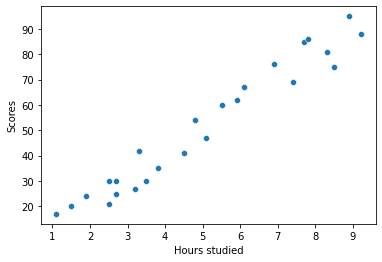

In [18]:
sns.scatterplot(x='Hours', y='Scores', data=df)
plt.xlabel('Hours studied')
plt.ylabel('Scores')

**Conclusion: There is a positive linear relation between hours studied and scores.**

### Preparing the data
We divide the data into dependent and independent variable.

In [34]:
# independent variable
X = df.iloc[:, :-1].values

# dependent(target) variable
y = df.iloc[:, 1].values

Now that we have our dependent and independent variables, we split the data into training set and testing set using the `train_test_split()` method from the Scikit-learn's library. 

In [30]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0)

### Training the model
We train the model using the `LinearRegression` algorithm.

In [ ]:
from sklearn.linear_model import LinearRegression  
lm = LinearRegression()

# Fitting the data
lm.fit(X_train, y_train)

### Making predictions

In [35]:
# Predicting the data
predictions = lm.predict(X_test)

In [51]:
# Comparing Actual vs Predicted
compare_scores = pd.DataFrame({'Actual Marks': y_test, 'Predicted Marks': predictions})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Model Evaluation: Calculate the Mean Absolute Errror in Test Data

In [47]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, predictions)
print('Mean Absolute Error: ', mae)

Mean Absolute Error:  4.183859899002975


### What is the predicted score of a student if he/she studies 9.5 hrs/day?

In [49]:
hours = [9.25]
predicted_score = lm.predict([hours])
print("Predicted Score = {}".format(round(predicted_score[0],3)))

Predicted Score = 93.692
